# Lasers Coding Exercise #1

## 1.1 Gaussian vs Lorentzian
In this part of the exercise you will compare Gaussian and Lorentzian functions which crop up a frequently in laser physics e.g. as laser line profiles (spectral distributions), laser beam profiles (spatial distributions), and laser pulse shapes (temporal distributions).

Here we consider line shapes which relates to the line broadening part of the course.


**a)**	Write a function `get_width(x, y)` that determines the width of a single-peaked distribution defined by x points `x` and y points `y`. 

You could make `get_width` return the width at a given fraction of the peak height passed in a keyword argument, which defaults to a FWHM width. 

Test get_width with the distribution  `f(x) = exp(-4*ln(2)*x**2)` – it should return a FWHM of 1.

**Answer**
I have chosen an approach that uses the indices to obtain the locations where the intensity is closest to halved for a singly peaked function. One way to improve this would be to use some form of interpolation or curve fitting to find a more accurate estimate, rather than the grid search method that is shown here.

In [41]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

def get_width(x,y):
    idx_max = np.argmax(y)

    y /= max(y)
    y = np.abs(y - 0.5)
    idx_left = np.argmin(y[:idx_max])
    idx_right = np.argmin(y[idx_max:])
    width = x[idx_max + idx_right] - x[idx_left]

    #f = interpolate.interp1d(x, y)
    
    return width

def f(x):
    return  np.exp(-4*np.log(2)*x**2)

x = np.linspace(-2,2,300)
get_width(x,f(x))

1.0033444816053514

**b)**	Write two functions, `gaussian(w,…)` and `lorentzian(w,…)` using the equations for these distributions given in the lecture notes, where the first positional argument `w` is the angular frequency $\omega$, and other parameters are passed-in as subsequent positional arguments.

In [60]:

def gaussian(w, w0, width):
    A = 2 * np.sqrt(np.log(2)/np.pi) / width
    b = -4* np.log(2)*(w-w0)**2 / width**2
    return A * np.exp(b)

def lorentzian(w, w0, width):
    A = 2 / (np.pi*width)
    
    return A * width**2 / (width**2 + 4*(w-w0)**2)

**c)**	Create a gaussian laser profile centred on $\omega_0$=2.36 rad/fs (fs = femtosecond) with a width of $\Delta\omega$=0.5 rad/fs and also make a lorentzian profile with the same parameters. Compare these profiles by plotting them on the same axes, first on a linear scale and then on a log vertical scale. A log scale helps you compare the “wings” of the distributions. Record your observations.

Note that $\omega_0$=2.36 rad/fs corresponds to $\lambda_0$ = 800 nm which is the centre wavelengh of titanium-doped-saphire lasers.

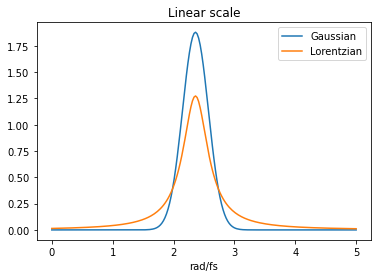

Text(0.5, 0, 'rad/fs')

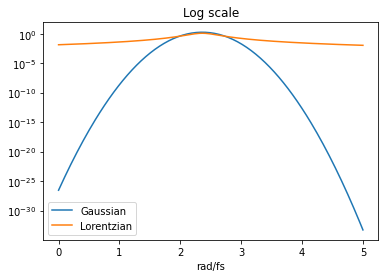

In [70]:
w = np.linspace(0,5,200)

plt.title('Linear scale')
plt.plot(w,gaussian(w, 2.36, 0.5), label='Gaussian')
plt.plot(w,lorentzian(w, 2.36,0.5), label='Lorentzian')
plt.legend()
plt.xlabel('rad/fs')
plt.show()

plt.title('Log scale')
plt.plot(w,gaussian(w, 2.36, 0.5), label='Gaussian')
plt.plot(w,lorentzian(w, 2.36,0.5), label='Lorentzian')
plt.legend()
plt.yscale('log')
plt.xlabel('rad/fs')

**d)**	Using your `get_width` function, convince yourself that the distributions have the expected widths.

In [73]:
get_width(w, gaussian(w, 2.36, 0.5)), get_width(w, lorentzian(w, 2.36, 0.5))

(0.5025125628140703, 0.5025125628140703)

### Extension

**e)**	Show that the areas under the distributions have the expected values. 

i) Start by integrating the guassian and lorentzian functions directly using `quad` integration from `scipy.integrate` (you can set an infinite integration range using `np.inf`). 

ii) Then obtain the areas of the sampled data using `simps` from `scipy.integrate`.

## 1.2 Voigt profile
In this part, you will simulate the combination of homogeneous and inhomogeneous broadening mechanisms and compare the result to the Voigt profile formula.


**a)**	Write a function that returns the width of a Voigt profile, as given by the empirical formula in the lecture notes.

**b)**	Calculate the Voigt profile as the convolution of the previous gaussian and Lorentzian profiles using `convolve` from `scipy.signal`. Use the option `mode='same'` with `convolve` to ensure the convolution is the same size as the inputs. Plot all three profiles on the same axes and record your observations. Don't worry if the peak of the convolution is not aligned with the peaks of the other pulses - this is a quirk of the way convolve returns the data. In reality, the peaks should coincide.

**c)** Use your get_width function to check the empirial formula for the FWHM of the Voigt profile.

### Extension

**d)**	Calculate a large number of convolutions (~100) of Gaussians and Lorentzians distributions of random widths in the range 0.1 - 2 rad/fs. Carry out a linear regression analysis of the Voigt empirical FWHMs vs the actual convolution widths using the `linregress` module from `scipy.stats` to test the validity of the empirical formula. Record your observations.